# WITH SEABORN

In [505]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [506]:
df0=pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df=df0.copy()

In [507]:
df.shape

(2535, 14)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## 1a: Box plot of age in both genders separeted by manner of death.

In [509]:
df.groupby("manner_of_death")["age"].value_counts()

manner_of_death   age 
shot              25.0    93
                  36.0    84
                  24.0    81
                  29.0    79
                  31.0    78
                          ..
shot and Tasered  58.0     1
                  60.0     1
                  67.0     1
                  70.0     1
                  76.0     1
Name: age, Length: 122, dtype: int64

In [510]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

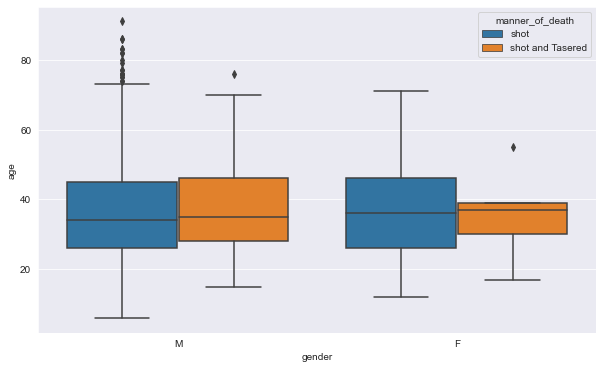

In [511]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=df);

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

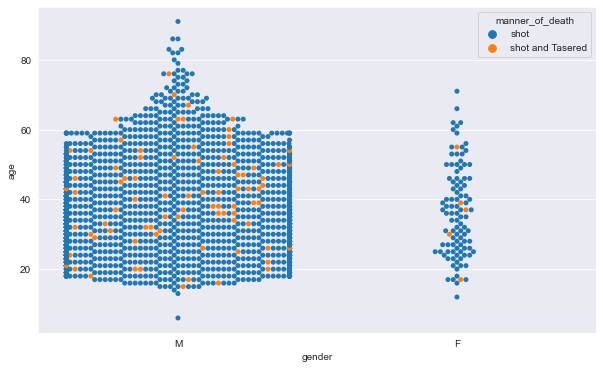

In [512]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=df);

In [513]:
#df.groupby("city")(df["threat_level"]=="attack").value_counts().head(12)
#city_freq = df["city"][(df["threat_level"]== "attack")].value_counts(dropna=False).head(12)
#city_freq

In [514]:
city_freq = df["city"].value_counts().head(12)
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

In [515]:
city_freq.index


Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object')

In [516]:
city_freq.values


array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14], dtype=int64)

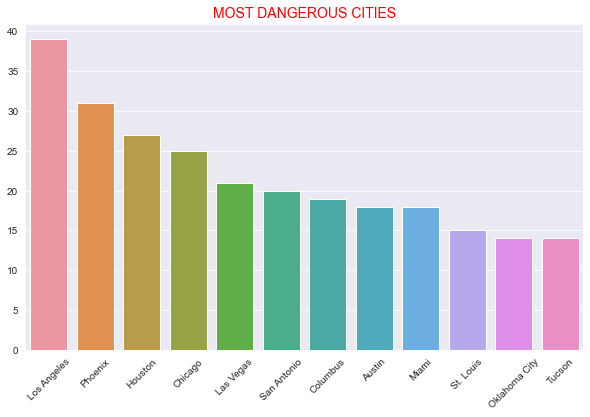

In [569]:
fig, ax =plt.subplots(figsize=(10,6))

ax = sns.barplot(x=city_freq.index, y=city_freq.values, data=df)

ax.set_xticklabels(city_freq.index, rotation=45)

ax.set_title("MOST DANGEROUS CITIES",color="r", size=14);

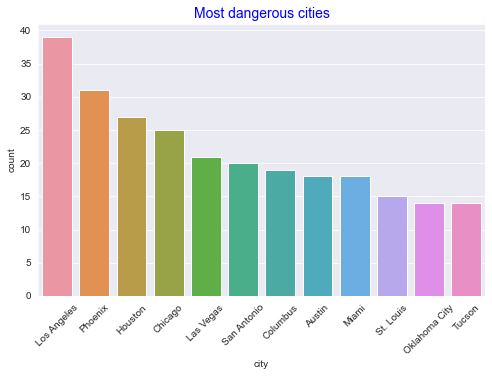

In [518]:
fig, ax =plt.subplots(figsize=(8,5))

ax=sns.countplot(x=df["city"], order = df["city"].value_counts().head(12).index, data=df) 

ax.set_xticklabels(city_freq.index, rotation=45)

ax.set_title("Most dangerous cities",color="b", size=14);

## 3: Plot 20 most dangerous states

In [519]:
state_freq = df.state.value_counts().head(20)
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

In [520]:
state_freq.index


Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO', 'IL', 'WA',
       'TN', 'LA', 'PA', 'NM', 'AL', 'VA', 'NY', 'SC'],
      dtype='object')

In [521]:
state_freq.values

array([424, 225, 154, 118,  79,  78,  74,  70,  69,  64,  62,  62,  59,
        57,  51,  51,  50,  47,  45,  44], dtype=int64)

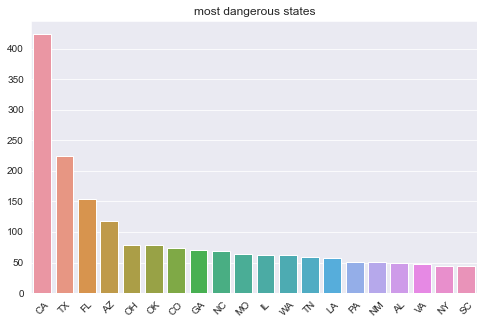

In [522]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))

ax = sns.barplot(state_freq.index, state_freq.values, data=df)

ax.set_xticklabels(state_freq.index,  rotation=45)

ax.set_title("most dangerous states");


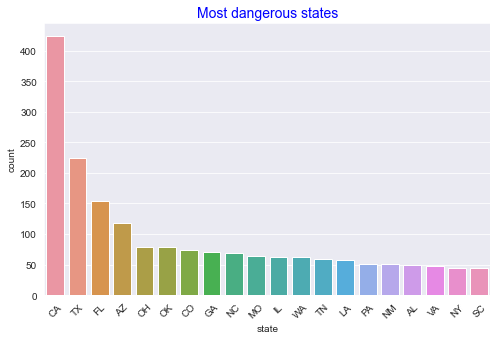

In [523]:
fig, ax =plt.subplots(figsize=(8,5))

ax=sns.countplot(x=df["state"], order = df["state"].value_counts().head(20).index, data=df) 

ax.set_xticklabels(state_freq.index, rotation=45)

ax.set_title("Most dangerous states",color="b", size=14);

## 4: Plot Having mental ilness or not for killed people

In [531]:
df.columns


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [532]:
illness = df.signs_of_mental_illness.value_counts(dropna=False)
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [533]:
illness.index

Index([False, True], dtype='object')

In [534]:
illness.values

array([1902,  633], dtype=int64)

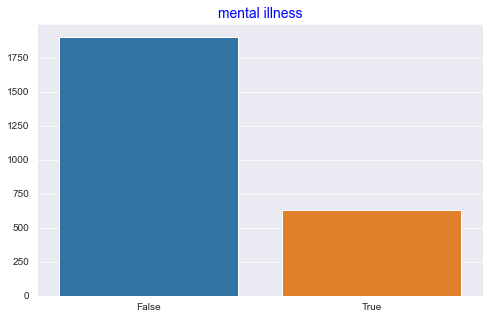

In [535]:
fig,axe =plt.subplots(figsize= (8, 5))

ax= sns.barplot(illness.index, illness.values, data=df)

ax.set_xticklabels(illness.index, rotation=0)

ax.set_title("mental illness", color="b", size =14);


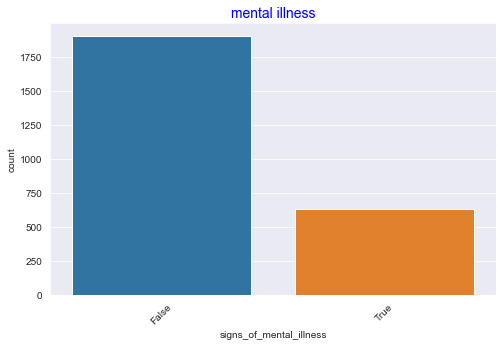

In [571]:
fig, ax =plt.subplots(figsize=(8,5))

ax=sns.countplot(df["signs_of_mental_illness"]) 

ax.set_xticklabels(illness.index, rotation=45)

ax.set_title("mental illness", color="b", size =14);


## 5: Plot number of Threat Types

In [568]:
df[["threat_level"]]

,threat_level
0,attack
1,attack
2,other
3,attack
4,attack
...,...
2530,attack
2531,attack
2532,attack
2533,attack


In [563]:
threads_freq = df.threat_level.value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

In [564]:
threads_freq.index

Index(['attack', 'other', 'undetermined'], dtype='object')

In [565]:
threads_freq.values

array([1611,  766,  158], dtype=int64)

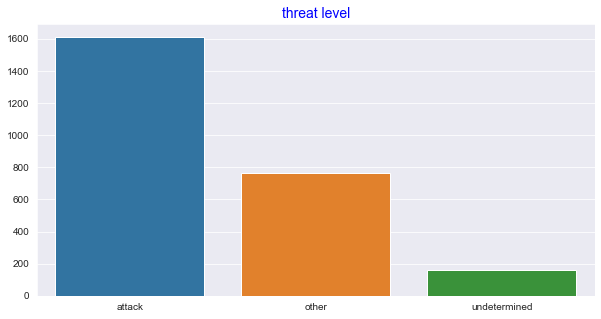

In [566]:
fig, ax= plt.subplots(figsize=(10,5))

ax=sns.barplot(threads_freq.index, threads_freq.values, data=df) 

ax.set_xticklabels(threads_freq.index, rotation=0)

ax.set_title("threat level", color="b", size="14");

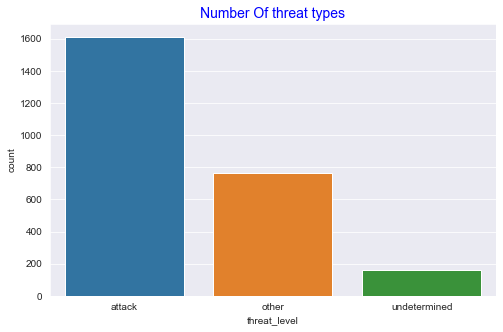

In [544]:
fig, ax= plt.subplots(figsize=(8,5))

ax=sns.countplot(df["threat_level"],  order = df["threat_level"].value_counts().index, data=df) 

ax.set_xticklabels (threads_freq.index, rotation=0)

ax.set_title("Number Of threat types", color="b", size =14);

## 6: Plot number of Flee Types

In [554]:
flee_freq = df.flee.value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [555]:
flee_freq.index


Index(['Not fleeing', 'Car', 'Foot', 'Other'], dtype='object')

In [556]:
flee_freq.values

array([1695,  385,  294,   96], dtype=int64)

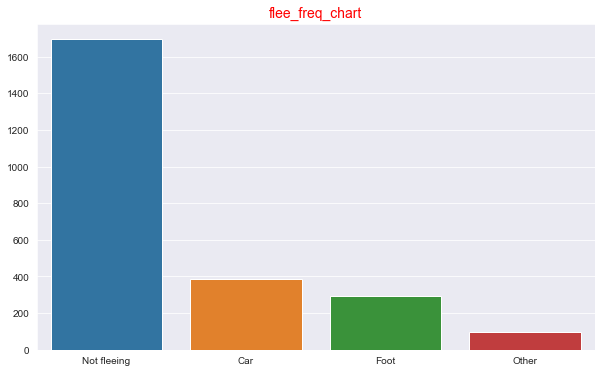

In [557]:
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.barplot(flee_freq.index, flee_freq.values,data=df)

ax.set_xticklabels(flee_freq.index, rotation=0 )

ax.set_title("flee_freq_chart", color="r", size=14);


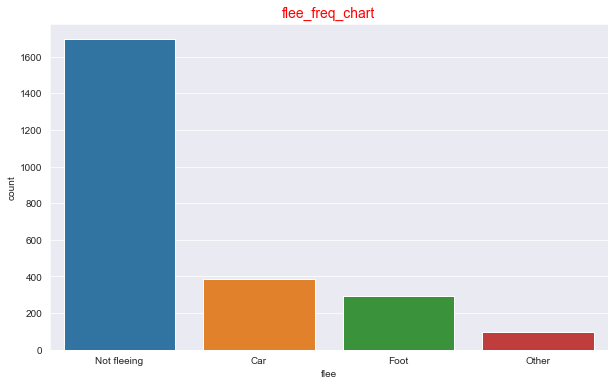

In [558]:
fig,ax = plt.subplots(figsize=(10,6))

ax=sns.countplot(df["flee"], order= df["flee"].value_counts().index ,data=df)

ax.set_xticklabels(flee_freq.index, rotation=0 )

ax.set_title("flee_freq_chart", color="r", size=14);
